# Data Cleaning and EDA

## Process of cleaning 

*Code written for cleaning in [cleaning.py](projects/project-3/code/cleaning.py).*

* We'll pass a list of the csv files from reddit into a function that cleans and concatenates the csvs into one dataframe.
    * For our purposes, it doesn't make much sense to keep posts that are null in the "selftext" column.
    * Next, I will remove any rows where this is the case. We'll also rename the "Unnamed: 0" column to "post_id".
    * Also, let's remove the "comments", utc, and title columns. Pulled these in just in case, but for now, I am not planning to access them.
    * I'll add a column that assign 0/1 values for the subreddit: 0 for the rpg subreddit, 1 for the osr subreddit
    * Return the concatenated dataframe
* Once the completed dataframe is created, use "post_id" to deduplicate the data. We'll get a final count of the subreddit post totals to see if we need to pull in more data. 

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import sys
import os
sys.path.append(os.path.abspath("./"))
import importlib
#importlib.reload(cleaning)  # Force reload the module


import cleaning

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [2]:
files = [f"../data/{file}" for file in os.listdir("../data") if file.endswith(".csv")]
files.remove('../data/cleaned_df.csv')
files.remove('../data/cleaned_with_sentiment_df.csv')

files

['../data/osr_244-489.csv',
 '../data/nsr_1000-1150.csv',
 '../data/osr_1931-2163.csv',
 '../data/osr_1683-1931.csv',
 '../data/nsr_1150-1394.csv',
 '../data/osr_0-243.csv',
 '../data/osr_490-1190.csv',
 '../data/osr_1190-1433.csv',
 '../data/nsr_1394-1628.csv',
 '../data/nsr_0-999.csv',
 '../data/nsr_1628-1862.csv',
 '../data/osr_1433-1683.csv']

In [3]:
cleaned = cleaning.clean_data(files)

In [4]:
cleaned = cleaned.drop_duplicates(subset="post_id")

In [5]:
cleaned["is_osr"].value_counts()


is_osr
1    1145
0    1102
Name: count, dtype: int64

### Now that we have at least 1000 posts from each of our subreddits, so I'm going to save our cleaned dataframe for safe keeping

In [6]:
#cleaned.to_csv("../data/cleaned_df.csv")

In [7]:
cleaned.shape
cleaned.head()
cleaned.tail()

# indexes are not unique, so I will reset them to make concatenation possible

cleaned = cleaned.reset_index()

In [8]:
cleaned.tail()

,index,post_id,selftext,subreddit,is_osr
2242,243,1j0hj6f,Pretty much the title. I am curious in terms o...,osr,1
2243,244,1j0gblw,I have a database of creature stats for PF2 an...,osr,1
2244,246,1j0fy0e,Not an OSR player but running a hex crawl for ...,osr,1
2245,247,1j0e1wc,I'm running an old school Adventure I won't na...,osr,1
2246,248,1j0dwly,My wife has expressed interest in giving ttrpg...,osr,1


Now that we have a dataframe with our reddit data, let's do some exploration on it. I will do some preprocessing on the dataframe here as well to be able to learn more about our data

In [9]:
cleaned["is_osr"].value_counts(normalize=True) 

is_osr
1    0.509568
0    0.490432
Name: proportion, dtype: float64

Our baseline accuracy is 50.9% that subreddit will be from the osr subreddit.  First, let's normalize our text by our tokenizing, lemmatizing, stemming, and  removing special characters and stop words. 


#### people on these subreddits can be verbose, so we'll use stemming instead of lemmatizing. This will be faster and not require us to tag all of the text we currently have with the part of speech it belings to to ensure appropriate conjugation. 




# week 5: nlp1 nlp2

# week 6: boosting


### Let's look at Countvectorizer
#### We preprocessed the data by hand above, but CountVectorizer can do this for us as well

In [ ]:
# eda using CountVectorizing in nlp 2 lesson

Words that show up the most in both

game          1936
https         1482
like          1370
just          1238
players       1178
com           1126
ve             852
play           826
games          807
time           727
rpg            670
new            669
character      662
people         660
want           658
rules          648
don            624
know           611
make           609
www            605
really         604
https www      582
osr            568
think          509
player         496
good           471
5e             464
campaign       463
gm             460
way            458
things         454
run            452
world          432
use            426
group          411
playing        411
fun            392
characters     389
dungeon        374
adventure      369
systems        362
feel           358
book           346
lot            343
old            330
table          330
ll             329
fantasy        325
got            312
need           311
dtype: int64

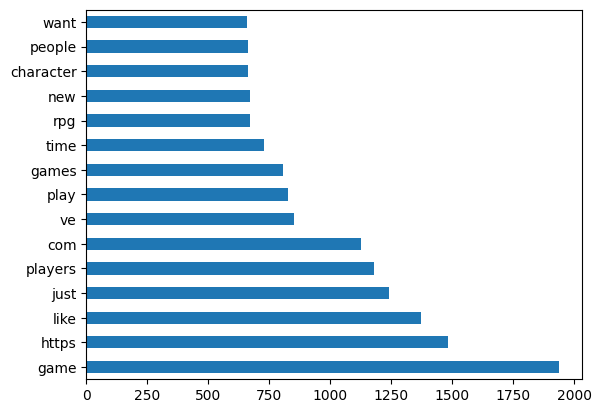

In [10]:
X = cleaned["selftext"]

y = cleaned["is_osr"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    random_state=123) 

#Instantiate then fit CountVectorizer
cvec = CountVectorizer(
    stop_words="english",
    ngram_range=(1,2),
    min_df=25,
    max_features=65
)

X_train_cv = cvec.fit_transform(X_train)
X_test_cv = cvec.transform(X_test)

X_train_df = pd.DataFrame(
    X_train_cv.toarray(), 
    columns=cvec.get_feature_names_out()
)

X_train_df.sum().sort_values(ascending = False).head(15).plot(kind='barh');
X_train_df.sum().sort_values(ascending = False).head(50)

In [11]:
#separate osr and rpg into their own dfs
osr_df = cleaned.loc[cleaned['is_osr'] == 1]
rpg_df = cleaned.loc[cleaned['is_osr'] == 0]


Words show most in osr


https        762
game         589
like         586
osr          538
com          502
just         484
players      444
ve           361
rules        311
new          307
play         291
www          272
games        266
really       259
https www    258
dungeon      256
know         248
5e           248
time         243
want         233
rpg          230
don          225
people       220
think        216
old          207
adventure    198
way          198
run          197
character    195
level        194
make         191
campaign     189
good         179
book         177
use          172
player       169
things       154
magic        153
fantasy      152
lot          151
free         150
playing      145
running      139
school       138
roll         138
world        137
post         137
party        131
table        129
fun          129
dtype: int64

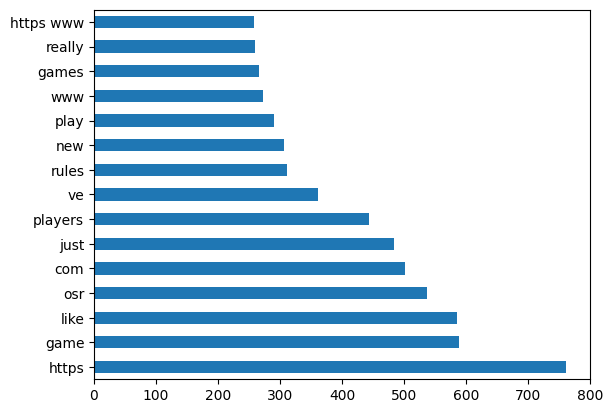

In [12]:
#CountVectorizer for osr

X = osr_df["selftext"]

y = osr_df["is_osr"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    random_state=123) 

cvec = CountVectorizer(
    stop_words="english",
    ngram_range=(1,2),
    min_df=25,
    max_features=65
)

X_train_cv = cvec.fit_transform(X_train)
X_test_cv = cvec.transform(X_test)

X_train_df_osr = pd.DataFrame(
    X_train_cv.toarray(), 
    columns=cvec.get_feature_names_out()
)

X_train_df_osr.sum().sort_values(ascending = False).head(15).plot(kind='barh');

X_train_df_osr.sum().sort_values(ascending = False).head(50)

 Words show up most in rpg

In [22]:
#CountVectorizer for rpg

X_rpg = rpg_df["selftext"]

y_rpg = rpg_df["is_osr"]

X_train, X_test, y_train, y_test = train_test_split(X_rpg,
                                                    y_rpg, 
                                                    random_state=123) 

cvec = CountVectorizer(
    stop_words="english",
    ngram_range=(1,2),
    min_df=0,
    max_features=100
)

X_train_cv = cvec.fit_transform(X_train)
X_test_cv = cvec.transform(X_test)

X_train_df_rpg = pd.DataFrame(
    X_train_cv.toarray(), 
    columns=cvec.get_feature_names_out()
)

X_train_df_rpg.sum().sort_values(ascending = False).head(15).plot(kind='barh');
X_train_df_rpg.sum().sort_values(ascending = False).head(50)

InvalidParameterError: The 'min_df' parameter of CountVectorizer must be a float in the range [0.0, 1.0] or an int in the range [1, inf). Got 0 instead.

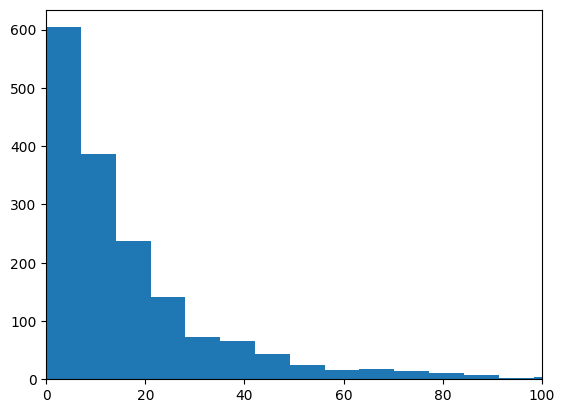

In [89]:
word_count = X_train_df.sum(axis = 1)
plt.hist(word_count, bins=100);
plt.xlim(0,100);

In [16]:
X_train_df

,5e,adventure,book,campaign,character,characters,com,combat,different,don,...,think,time,use,ve,want,way,work,world,www,years
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,2,1,0,1,1,1,...,2,0,3,1,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1681,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1682,0,0,0,1,2,1,2,0,0,0,...,0,1,1,1,0,1,0,0,2,0
1683,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Since our classes are balanced, for now, we won't need to normalize our data.